# Zaman et al.

### define process data function

In [1]:
def compare_brine_concentrations(dataframe, raw_data, export_path, elemental_masses, literature_cf, original_concentrations = True):
    from chempy.properties.water_density_tanaka_2001 import water_density
    from sigfig import round
    from scipy.constants import milli, kilo
    from matplotlib import pyplot
    import matplotlib

    pandas.set_option('display.max_columns', None)
    pandas.set_option('display.max_rows', None)
    print('raw_data')
    display(raw_data)
    print('processed_data')
    display(dataframe)
    
    # final effluent concentrations
    final_cf = raw_data['mass_H2O'].iloc[0] / raw_data['mass_H2O'].iloc[-1]
    last_row = dataframe.iloc[-1]
    print('literature_cf', literature_cf)
    print('final_cf', final_cf)

    # feed concentrations
    water_density = water_density()/kilo
    solution_description = 'Zaman'
    custom_water_parameters = {
        'element': {
            'Ca': {
                'concentration (ppm)':0.21*elemental_masses['Ca'],
                'reference': ''
            },
            'Mg': {
                'concentration (ppm)':0.1*elemental_masses['Mg'],
                'reference':''
            },
            'Na': {
                'concentration (ppm)':109.04*elemental_masses['Na'],
                'reference':''
            },
            'Sr': {
                'concentration (ppm)':0.044*elemental_masses['Sr'],
                'reference':''
            },
            'Cl': {
                'concentration (ppm)':72.73*elemental_masses['Cl'],
                'reference':''
            },
            'S(6)': {
                'concentration (ppm)':0.375*elemental_masses['S'],
                'reference':''
            },
            'Ba': {
                'concentration (ppm)':0.019*elemental_masses['Ba'],
                'reference':''
            },
            'B': {
                'concentration (ppm)':0.27*elemental_masses['B'],
                'reference':''
            },
            'K': {
                'concentration (ppm)':0.37*elemental_masses['K'],
                'reference':''
            }
        },
        'pH': {
            'value': 9.125,
            'reference': ''
        }
    }
    
    def make_molal(elements):
        molals = {}
        for element in elements:
            original_element = element
            element = re.sub('(?:\(\d\))', '', element)
            mass = elemental_masses[element]/milli
            if type(elements[original_element]) is dict:
                ppm_conc = elements[original_element]['concentration (ppm)']
            else:
                ppm_conc = elements[original_element]
            molal_conc = ppm_conc / water_density / mass
            molals[original_element] = float(molal_conc)
            
        return molals

    molals = make_molal(custom_water_parameters['element'])
    literature_molals = make_molal(literature_final_conc)
    
    # final effluent CF for each element
    cfs = {}
    diff_list = []
    labels = []
    for element, final_conc in last_row.iteritems():
        element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
        cfs[element] = {}
        initial_conc = molals[element]

        if original_concentrations:
            if element in literature_elemental_cfs:
                cfs[element]['cf'] = float(final_conc) / initial_conc
                diff = ((cfs[element]['cf'] - literature_elemental_cfs[element]) / literature_elemental_cfs[element]) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff
                
        elif not original_concentrations:
            if element in literature_final_conc:
                predicted_conc = initial_conc * literature_cf
                literature_conc = literature_molals[element]
                diff = ((predicted_conc - literature_conc) / literature_conc) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff

    # define a bar graph of CF error 
    print(cfs)
    labels.append('CF')
    total_cf_error = ((final_cf - literature_cf) / literature_cf * 100)
    diff_list.append(total_cf_error)
    min_diff = min(diff_list) - 5
    max_diff = max(diff_list) + 5

    pyplot.rcParams['figure.figsize'] = (12, 9)
    pyplot.rcParams['figure.dpi'] = 100
    figure, ax = pyplot.subplots()
    bar_graph = ax.bar(labels, diff_list)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('relative % difference')
    ax.set_ylim(min_diff, max_diff)
    ax.set_xlabel('Element')
    ax.set_title('Elemental difference of ROSSpy from Zaman et al.')
    diff_list = [round(value, 2, notation = 'sci') for value in diff_list]
    ax.bar_label(bar_graph, diff_list)
    figure.savefig(export_path)

## Execute through all_time





Estimated completion in 5.00E1 seconds by 2022-01-02 14:05:43.927420 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


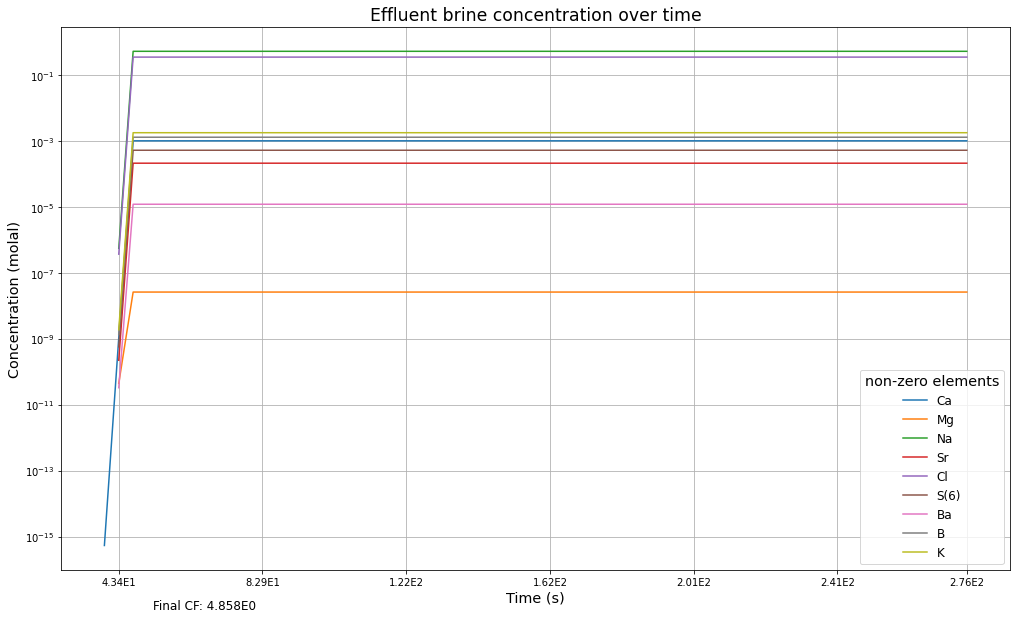

raw_data


,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw),Anhydrite,d_Anhydrite,Aragonite,d_Aragonite,Arcanite,d_Arcanite,Artinite,d_Artinite,Barite,d_Barite,Bischofite,d_Bischofite,Bloedite,d_Bloedite,Brucite,d_Brucite,Burkeite,d_Burkeite,Calcite,d_Calcite,Carnallite,d_Carnallite,Celestite,d_Celestite,Dolomite,d_Dolomite,Epsomite,d_Epsomite,Gaylussite,d_Gaylussite,Glaserite,d_Glaserite,Glauberite,d_Glauberite,Goergeyite,d_Goergeyite,Gypsum,d_Gypsum,Halite,d_Halite,Hexahydrite,d_Hexahydrite,Huntite,d_Huntite,Kainite,d_Kainite,Kieserite,d_Kieserite,Labile_S,d_Labile_S,Leonhardite,d_Leonhardite,Leonite,d_Leonite,Magnesite,d_Magnesite,MgCl2_2H2O,d_MgCl2_2H2O,MgCl2_4H2O,d_MgCl2_4H2O,Mirabilite,d_Mirabilite,Natron,d_Natron,Nesquehonite,d_Nesquehonite,Pentahydrite,d_Pentahydrite,Pirssonite,d_Pirssonite,Polyhalite,d_Polyhalite,Portlandite,d_Portlandite,Schoenite,d_Schoenite,Sylvite,d_Sylvite,Syngenite,d_Syngenite,Thenardite,d_Thenardite,Teepleite,d_Teepleite,si_Anhydrite,si_Aragonite,si_Arcanite,si_Artinite,si_Barite,si_Bischofite,si_Bloedite,si_Brucite,si_Burkeite,si_Calcite,si_Carnallite,si_Celestite,si_Dolomite,si_Epsomite,si_Gaylussite,si_Glaserite,si_Glauberite,si_Goergeyite,si_Gypsum,si_Halite,si_Hexahydrite,si_Huntite,si_Kainite,si_Kieserite,si_Labile_S,si_Leonhardite,si_Leonite,si_Magnesite,si_MgCl2_2H2O,si_MgCl2_4H2O,si_Mirabilite,si_Natron,si_Nesquehonite,si_Pentahydrite,si_Pirssonite,si_Polyhalite,si_Portlandite,si_Schoenite,si_Sylvite,si_Syngenite,si_Thenardite,si_Teepleite
3,1,transp,12,0.973667,0.000000,0,7.000000,4.0,13.837078,25.0,1.216293e-09,1.006454e-07,17.378154,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
4,1,transp,12,0.973667,3.946330,1,7.000040,4.0,13.837078,25.0,1.234915e-09,1.006455e-07,17.116101,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
5,1,transp,12,0.973667,7.892659,2,7.000088,4.0,13.837078,25.0,1.257209e-09,1.006455e-07,16.812574,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+0

processed_data


,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw)
Time (s),,,,,,,,,
3.95E1,5.427E-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.34E1,1.079E-9,4.481E-11,5.601E-7,2.260E-10,3.736E-7,5.785E-10,3.313E-11,1.387E-9,1.901E-9
4.74E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.13E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.52E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.92E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
6.31E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
6.71E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
7.10E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3


literature_cf 4.972161162264564
final_cf 4.857737895787824
{'Ca': {'cf': 4.86653903435057, '% diff': -7.093345707852773}, 'Mg': {'cf': 0.00026401805133869895, '% diff': -99.99461187650328}, 'Na': {'cf': 4.868193638463675, '% diff': -5.452437600085652}, 'Sr': {'cf': 4.867402278525177, '% diff': 2.964278968801843}, 'Cl': {'cf': 4.868024163284266, '% diff': -7.219235483316375}, 'S(6)': {'cf': 1.410755065864186, '% diff': -67.74188111591037}, 'Ba': {'cf': 0.6402091402313818, '% diff': -87.83602633560375}, 'B': {'cf': 4.867066572457274, '% diff': 0.3135858445392287}, 'K': {'cf': 4.869362076110773, '% diff': -2.6127584777845314}}


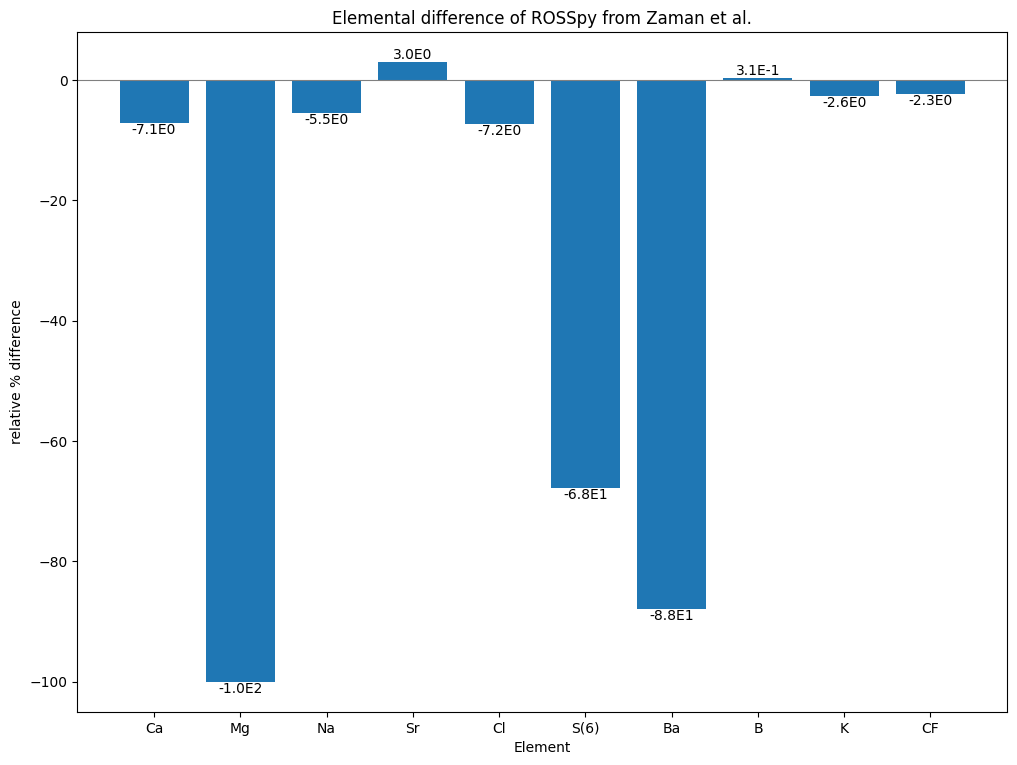

In [3]:
from scipy.constants import nano, milli, day, hour
from chemicals import periodic_table
import os

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW
    
def average(some_list):
    return sum(some_list)/ len(some_list)

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

# water parameters
solution_description = 'Zaman'
water_characteristics = {
    'element': {
        'Ca': {
            'concentration (ppm)':0.21*elemental_masses['Ca'],
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':0.1*elemental_masses['Mg'],
            'reference':''
        },
        'Na': {
            'concentration (ppm)':109.04*elemental_masses['Na'],
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':0.044*elemental_masses['Sr'],
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':72.73*elemental_masses['Cl'],
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':0.375*elemental_masses['S'],
            'reference':''
        },
        'Ba': {
            'concentration (ppm)':0.019*elemental_masses['Ba'],
            'reference':''
        },
        'B': {
            'concentration (ppm)':0.27*elemental_masses['B'],
            'reference':''
        },
        'K': {
            'concentration (ppm)':0.37*elemental_masses['K'],
            'reference':''
        }
    },
    'pH': {
        'value': 9.125,
        'reference': ''
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 1.1*elemental_masses['Ca'],
    'Mg': 0.49*elemental_masses['Mg'],
    'Na': 561.44*elemental_masses['Na'],
    'Sr': 0.208*elemental_masses['Sr'],
    'Ba': 0.1*elemental_masses['Ba'],
    'B': 1.31*elemental_masses['B'],
    'Cl': 381.6*elemental_masses['Cl'],
    'K': 1.85*elemental_masses['K'],
    'S(6)': 1.64*elemental_masses['S']
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(water_characteristics['element'][element]['concentration (ppm)'])
literature_cf = average([(literature_elemental_cfs[element]) for element in literature_elemental_cfs])

# general parameters
database_selection = 'pitzer'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 275
simulation_name = 'PHREEQ_ionic_concentrations'

# create the input file
ross.define_general(database_selection, simulation)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(literature_cf)
ross.solutions(solution_description, water_characteristics, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, elemental_masses, literature_cf)

## Execute through all_time, with improved predictions





Estimated completion in 5.00E1 seconds by 2022-01-02 14:06:45.984135 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


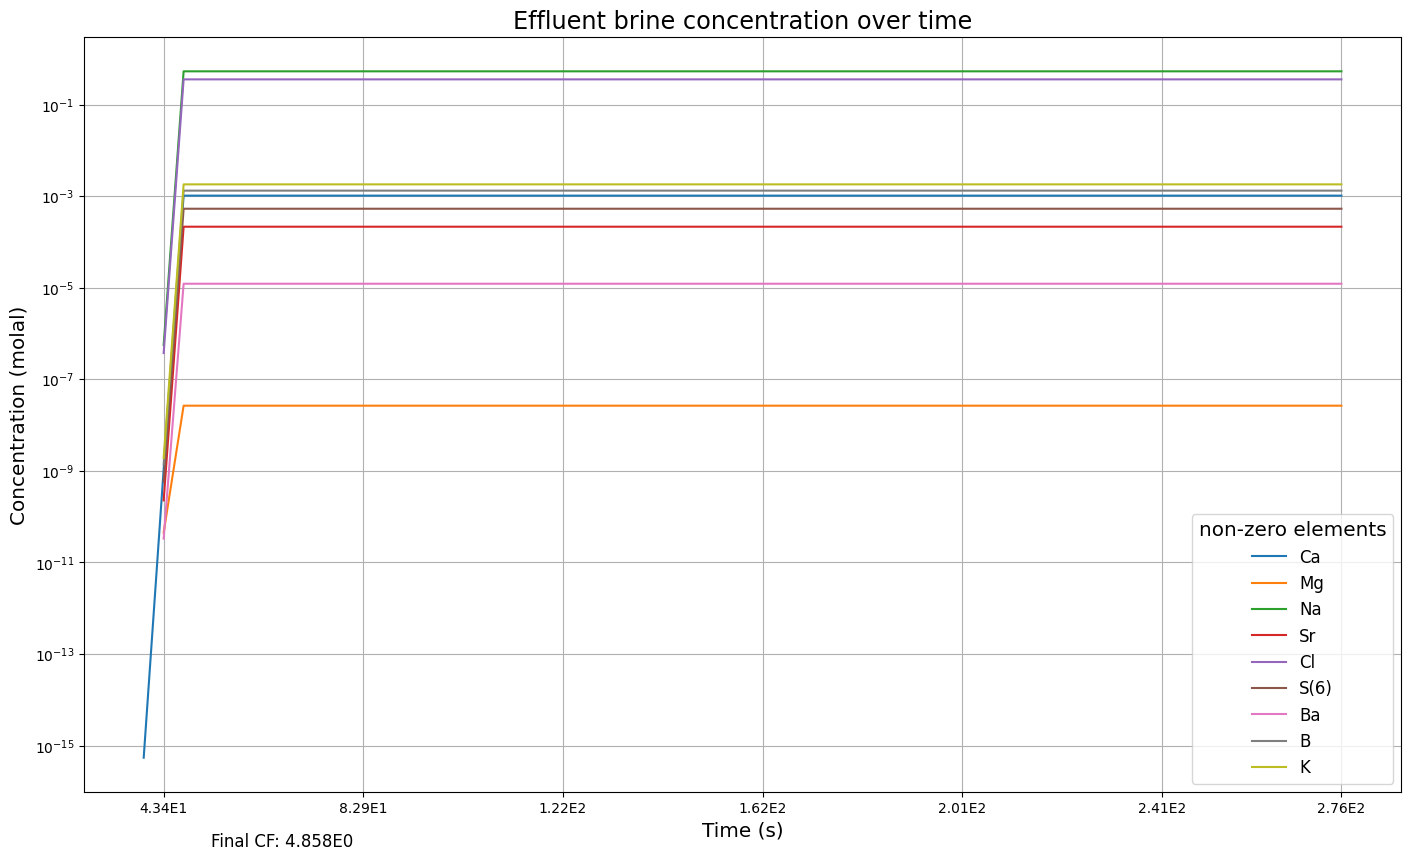

raw_data


,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw),Anhydrite,d_Anhydrite,Aragonite,d_Aragonite,Arcanite,d_Arcanite,Artinite,d_Artinite,Barite,d_Barite,Bischofite,d_Bischofite,Bloedite,d_Bloedite,Brucite,d_Brucite,Burkeite,d_Burkeite,Calcite,d_Calcite,Carnallite,d_Carnallite,Celestite,d_Celestite,Dolomite,d_Dolomite,Epsomite,d_Epsomite,Gaylussite,d_Gaylussite,Glaserite,d_Glaserite,Glauberite,d_Glauberite,Goergeyite,d_Goergeyite,Gypsum,d_Gypsum,Halite,d_Halite,Hexahydrite,d_Hexahydrite,Huntite,d_Huntite,Kainite,d_Kainite,Kieserite,d_Kieserite,Labile_S,d_Labile_S,Leonhardite,d_Leonhardite,Leonite,d_Leonite,Magnesite,d_Magnesite,MgCl2_2H2O,d_MgCl2_2H2O,MgCl2_4H2O,d_MgCl2_4H2O,Mirabilite,d_Mirabilite,Natron,d_Natron,Nesquehonite,d_Nesquehonite,Pentahydrite,d_Pentahydrite,Pirssonite,d_Pirssonite,Polyhalite,d_Polyhalite,Portlandite,d_Portlandite,Schoenite,d_Schoenite,Sylvite,d_Sylvite,Syngenite,d_Syngenite,Thenardite,d_Thenardite,Teepleite,d_Teepleite,si_Anhydrite,si_Aragonite,si_Arcanite,si_Artinite,si_Barite,si_Bischofite,si_Bloedite,si_Brucite,si_Burkeite,si_Calcite,si_Carnallite,si_Celestite,si_Dolomite,si_Epsomite,si_Gaylussite,si_Glaserite,si_Glauberite,si_Goergeyite,si_Gypsum,si_Halite,si_Hexahydrite,si_Huntite,si_Kainite,si_Kieserite,si_Labile_S,si_Leonhardite,si_Leonite,si_Magnesite,si_MgCl2_2H2O,si_MgCl2_4H2O,si_Mirabilite,si_Natron,si_Nesquehonite,si_Pentahydrite,si_Pirssonite,si_Polyhalite,si_Portlandite,si_Schoenite,si_Sylvite,si_Syngenite,si_Thenardite,si_Teepleite
3,1,transp,12,0.973667,0.000000,0,7.000000,4.0,13.837078,25.0,1.216293e-09,1.006454e-07,17.378154,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
4,1,transp,12,0.973667,3.946330,1,7.000040,4.0,13.837078,25.0,1.234915e-09,1.006455e-07,17.116101,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
5,1,transp,12,0.973667,7.892659,2,7.000088,4.0,13.837078,25.0,1.257209e-09,1.006455e-07,16.812574,-2.113692e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+0

processed_data


,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw)
Time (s),,,,,,,,,
3.95E1,5.427E-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.34E1,1.079E-9,4.481E-11,5.601E-7,2.260E-10,3.736E-7,5.785E-10,3.313E-11,1.387E-9,1.901E-9
4.74E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.13E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.52E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
5.92E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
6.31E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
6.71E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3
7.10E1,1.025E-3,2.648E-8,5.324E-1,2.148E-4,3.551E-1,5.306E-4,1.220E-5,1.318E-3,1.807E-3


literature_cf 4.972161162264564
final_cf 4.857737895787824
{'Ca': {'% diff': -5.076923265858313}, 'Mg': {'% diff': 1.4726767809095063}, 'Na': {'% diff': -3.4332336254402693}, 'Sr': {'% diff': 5.180332278673475}, 'Cl': {'% diff': -5.234465059878982}, 'S(6)': {'% diff': 13.69270950300072}, 'Ba': {'% diff': -5.528937916973291}, 'B': {'% diff': 2.479657542857412}, 'K': {'% diff': -0.5567767547087205}}


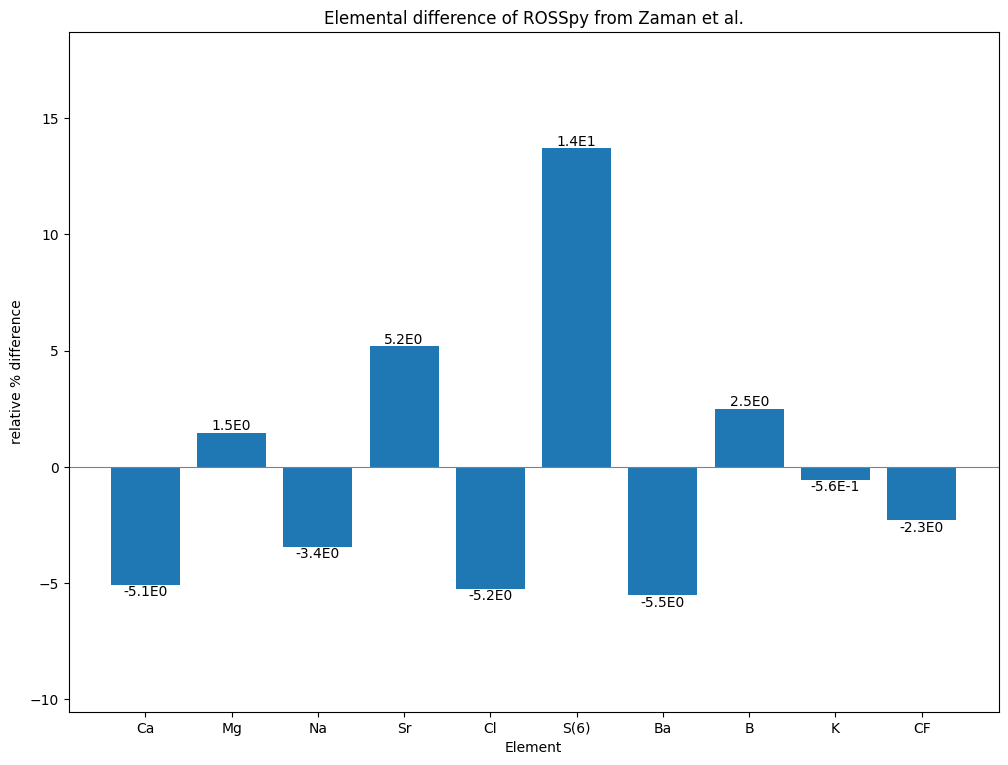

In [5]:
from scipy.constants import nano, milli, day, hour
from chemicals import periodic_table

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW
    
def average(some_list):
    return sum(some_list)/ len(some_list)

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

# water parameters
solution_description = 'Zaman'
water_characteristics = {
    'element': {
        'Ca': {
            'concentration (ppm)':0.21*elemental_masses['Ca'],
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':0.1*elemental_masses['Mg'],
            'reference':''
        },
        'Na': {
            'concentration (ppm)':109.04*elemental_masses['Na'],
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':0.044*elemental_masses['Sr'],
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':72.73*elemental_masses['Cl'],
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':0.375*elemental_masses['S'],
            'reference':''
        },
        'Ba': {
            'concentration (ppm)':0.019*elemental_masses['Ba'],
            'reference':''
        },
        'B': {
            'concentration (ppm)':0.27*elemental_masses['B'],
            'reference':''
        },
        'K': {
            'concentration (ppm)':0.37*elemental_masses['K'],
            'reference':''
        }
    },
    'pH': {
        'value': 9.125,
        'reference': ''
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 1.1*elemental_masses['Ca'],
    'Mg': 0.49*elemental_masses['Mg'],
    'Na': 561.44*elemental_masses['Na'],
    'Sr': 0.208*elemental_masses['Sr'],
    'Ba': 0.1*elemental_masses['Ba'],
    'B': 1.31*elemental_masses['B'],
    'Cl': 381.6*elemental_masses['Cl'],
    'K': 1.85*elemental_masses['K'],
    'S(6)': 1.64*elemental_masses['S']
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(water_characteristics['element'][element]['concentration (ppm)'])
literature_cf = average([(literature_elemental_cfs[element]) for element in literature_elemental_cfs])

# general parameters
database_selection = 'pitzer'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 275
simulation_name = 'CF_ionic_concentrations'

# create the input file
ross.define_general(database_selection, simulation)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(literature_cf)
ross.solutions(solution_description, water_characteristics, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, elemental_masses, literature_cf, False)

## Execute a single module over all_distance





Estimated completion in 5.00E1 seconds by 2022-01-02 14:07:28.704540 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


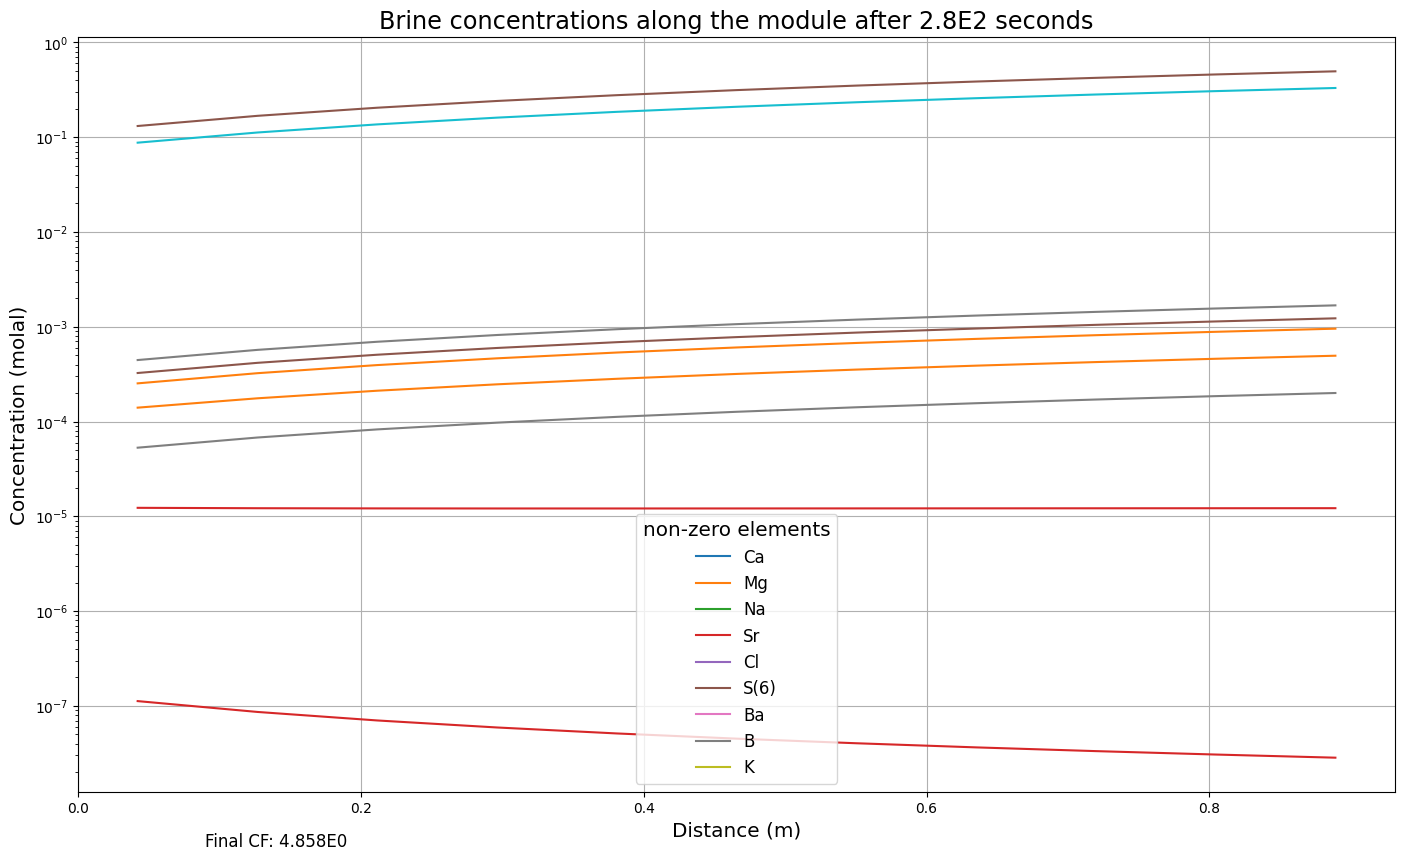

In [6]:
from scipy.constants import nano, milli, day, hour
from chemicals import periodic_table

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW
    
def average(some_list):
    return sum(some_list)/ len(some_list)

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

# water parameters
solution_description = 'Zaman'
water_characteristics = {
    'element': {
        'Ca': {
            'concentration (ppm)':0.21*elemental_masses['Ca'],
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':0.1*elemental_masses['Mg'],
            'reference':''
        },
        'Na': {
            'concentration (ppm)':109.04*elemental_masses['Na'],
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':0.044*elemental_masses['Sr'],
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':72.73*elemental_masses['Cl'],
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':0.375*elemental_masses['S'],
            'reference':''
        },
        'Ba': {
            'concentration (ppm)':0.019*elemental_masses['Ba'],
            'reference':''
        },
        'B': {
            'concentration (ppm)':0.27*elemental_masses['B'],
            'reference':''
        },
        'K': {
            'concentration (ppm)':0.37*elemental_masses['K'],
            'reference':''
        }
    },
    'pH': {
        'value': 9.125,
        'reference': ''
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 1.1*elemental_masses['Ca'],
    'Mg': 0.49*elemental_masses['Mg'],
    'Na': 561.44*elemental_masses['Na'],
    'Sr': 0.208*elemental_masses['Sr'],
    'Ba': 0.1*elemental_masses['Ba'],
    'B': 1.31*elemental_masses['B'],
    'Cl': 381.6*elemental_masses['Cl'],
    'K': 1.85*elemental_masses['K'],
    'S(6)': 1.64*elemental_masses['S']
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(water_characteristics['element'][element]['concentration (ppm)'])
literature_cf = average([(literature_elemental_cfs[element]) for element in literature_elemental_cfs])

# general parameters
database_selection = 'pitzer'
simulation = 'brine'
simulation_perspective = 'all_distance'
simulation_time = 275
simulation_name = 'concentrations_over_module'

# create the input file
ross.define_general(database_selection, simulation)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(literature_cf)
ross.solutions(solution_description, water_characteristics, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()